# Machine Learning and Comic Book Characters
Ariana Olson, Emma Price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import thinkstats2
import thinkplot

import sklearn.linear_model as linear_model
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras.models
import keras.layers

import pickle

Using TensorFlow backend.


## Explore the data

In [2]:
with open('cat_dicts_both.pkl', 'rb') as f:
    cat_dicts_both = pickle.load(f)
    
with open('cat_dicts_both.pkl', 'rb') as f:
    cat_dicts_both = pickle.load(f)
    
with open('cat_dicts_both.pkl', 'rb') as f:
    cat_dicts_both = pickle.load(f)

In [3]:
both_df = pd.read_hdf('both_df.hdf5', key='both')
marvel_df = pd.read_hdf('marvel_df.hdf5', key='marvel')
dc_df = pd.read_hdf('dc_df.hdf5', key='dc')

In [4]:
both_df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,15641,9764,4.0,1.0,10.0,6.0,4.0,NaN,1.0,4043.0,869.0,1962.0
1,7139,2633,1629,3.0,1.0,4.0,25.0,4.0,NaN,1.0,3360.0,1259.0,1941.0
2,64786,17911,11142,3.0,2.0,4.0,2.0,4.0,NaN,1.0,3061.0,1486.0,1974.0
3,1868,7607,4735,3.0,1.0,4.0,2.0,4.0,NaN,1.0,2961.0,1275.0,1963.0
4,2460,16503,10256,2.0,1.0,4.0,3.0,4.0,NaN,1.0,2258.0,1401.0,1950.0


In [5]:
both_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18295 entries, 0 to 18294
Data columns (total 13 columns):
page_id             18295 non-null int64
name                18295 non-null int64
urlslug             18295 non-null int64
ID                  14061 non-null float64
ALIGN               16045 non-null float64
EYE                 8496 non-null float64
HAIR                13611 non-null float64
SEX                 17728 non-null float64
GSM                 145 non-null float64
ALIVE               18291 non-null float64
APPEARANCES         17939 non-null float64
FIRST APPEARANCE    17851 non-null float64
Year                17851 non-null float64
dtypes: float64(10), int64(3)
memory usage: 2.0 MB


In [6]:
both_df.describe()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
count,18295.000000,18295.000000,18295.000000,14061.000000,16045.000000,8496.000000,13611.000000,17728.000000,145.000000,18291.000000,17939.000000,17851.000000,17851.000000
mean,219154.987483,9147.000000,9147.000000,3.409004,0.650545,7.728696,6.942840,3.177177,1.648276,0.754633,22.906517,927.168338,1985.812447
std,213972.005972,5281.455923,5281.455923,0.663455,0.695984,6.475668,6.904425,1.340334,0.901627,0.430316,103.055100,394.678077,19.288066
min,1025.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1935.000000
25%,21599.500000,4573.500000,4573.500000,3.000000,0.000000,4.000000,2.000000,1.000000,2.000000,1.000000,2.000000,602.500000,1975.000000
50%,154770.000000,9147.000000,9147.000000,4.000000,1.000000,5.000000,3.000000,4.000000,2.000000,1.000000,5.000000,927.000000,1990.000000
75%,348820.000000,13720.500000,13720.500000,4.000000,1.000000,8.000000,10.000000,4.000000,2.000000,1.000000,13.000000,1260.000000,2000.000000
max,754840.000000,18294.000000,18294.000000,4.000000,3.000000,25.000000,26.000000,5.000000,5.000000,1.000000,4043.000000,1574.000000,2013.000000


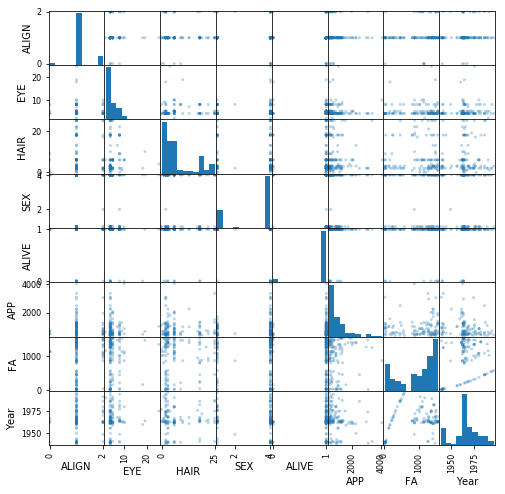

In [49]:
X = both_df.drop(['ID', 'page_id', 'name','urlslug', 'GSM'], axis=1).values

df =  pd.DataFrame(X, columns = ['ALIGN', 'EYE', 'HAIR', 'SEX','ALIVE','APP','FA','Year'])
df = df[df['APP']>400]


_ = pd.plotting.scatter_matrix(df.dropna(),alpha = 0.3, figsize=[8,8])

In [14]:
y = both_df.dropna()['FIRST APPEARANCE'].values
X = both_df.dropna().drop(['FIRST APPEARANCE', 'page_id', 'name','urlslug'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

linreg = linear_model.LinearRegression()

linreg.fit(X_train,y_train)

y_pred = linreg.predict(X_test)

print("R^2: {}".format(linreg.score(X_test, y_test)))

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error: {}".format(rmse))

R^2: -0.29662650459534623
Root Mean Squared Error: 335.2740287731567


In [17]:
y = both_df.dropna()['Year'].values
X = both_df.dropna().drop(['Year', 'page_id', 'name','urlslug'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

linreg = linear_model.LinearRegression()

linreg.fit(X_train,y_train)

y_pred = linreg.predict(X_test)

print("R^2: {}".format(linreg.score(X_test, y_test)))

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error: {}".format(rmse))

R^2: -0.21643509501953728
Root Mean Squared Error: 13.447765112321617
